### Encoder에서 구한 hs로 c 구하는 과정

In [4]:
import numpy as np

T, H = 5, 4
hs = np.random.randn(T, H)
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])
print(hs)
print(a)

[[ 1.65641924  0.65991104 -1.00773616 -0.067016  ]
 [ 0.89511791  0.74726658  0.29087018 -1.45965492]
 [-0.35755054 -0.53916511 -1.95302288  0.90969593]
 [-0.42981034  0.04052934  0.80436421 -0.02417267]
 [ 0.09266608 -0.93723456 -0.51451559  0.26999735]]
[0.8  0.1  0.03 0.05 0.02]


In [5]:
ar = a.reshape(5, 1).repeat(4, axis = 1)
print(ar)

[[0.8  0.8  0.8  0.8 ]
 [0.1  0.1  0.1  0.1 ]
 [0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.05]
 [0.02 0.02 0.02 0.02]]


In [7]:
t = ar * hs
c = np.sum(t, axis = 0)
print(c)

[ 1.38428347  0.56976231 -0.8057647  -0.1680961 ]


### 날짜 변환기

In [8]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


In [9]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()


In [13]:
print(x_train[0])
print(t_train)

[ 8 22  9 22  9  8  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7]
[[14 11 12 ... 15 16  9]
 [14 11 12 ... 15 16 36]
 [14 11 12 ... 15 11 20]
 ...
 [14  8 16 ... 15  8 11]
 [14 11 12 ... 15 11  8]
 [14  8 16 ... 15 16  9]]


In [14]:
# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]


In [15]:
# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()



| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 14[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 29[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 42[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 56[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 70[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 84[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 98[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 111[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 125[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 138[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 152[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 166[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 180[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 193[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 207[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 220[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 233[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
X 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
X 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
X 1978-08-11
---
Q Tuesday, November

Q 10/28/13                     
T 2013-10-28
O 2013-10-28
---
Q sunday, november 6, 2016     
T 2016-11-06
O 2016-11-06
---
정확도 99.940%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 0.00
| 에폭 7 |  반복 21 / 351 | 시간 18[s] | 손실 0.00
| 에폭 7 |  반복 41 / 351 | 시간 36[s] | 손실 0.00
| 에폭 7 |  반복 61 / 351 | 시간 52[s] | 손실 0.00
| 에폭 7 |  반복 81 / 351 | 시간 67[s] | 손실 0.00
| 에폭 7 |  반복 101 / 351 | 시간 82[s] | 손실 0.00
| 에폭 7 |  반복 121 / 351 | 시간 96[s] | 손실 0.00
| 에폭 7 |  반복 141 / 351 | 시간 111[s] | 손실 0.00
| 에폭 7 |  반복 161 / 351 | 시간 126[s] | 손실 0.00
| 에폭 7 |  반복 181 / 351 | 시간 143[s] | 손실 0.00
| 에폭 7 |  반복 201 / 351 | 시간 159[s] | 손실 0.00
| 에폭 7 |  반복 221 / 351 | 시간 174[s] | 손실 0.00
| 에폭 7 |  반복 241 / 351 | 시간 192[s] | 손실 0.00
| 에폭 7 |  반복 261 / 351 | 시간 210[s] | 손실 0.00
| 에폭 7 |  반복 281 / 351 | 시간 226[s] | 손실 0.00
| 에폭 7 |  반복 301 / 351 | 시간 241[s] | 손실 0.01
| 에폭 7 |  반복 321 / 351 | 시간 257[s] | 손실 0.05
| 에폭 7 |  반복 341 / 351 | 시간 273[s] | 손실 0.01
Q 10/15/94                     
T 1994-10-15
O 1994-10-15
---
Q thur

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from curre

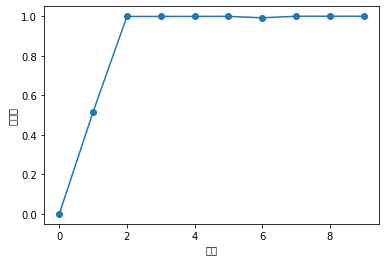

In [16]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()
